In [2]:
from sympy import *
init_printing(use_unicode=True)
from sympy.codegen.ast import Assignment

In [3]:
m, n = symbols('m n')
x = symbols('x')
theta = Symbol("theta")

In [4]:
m = cos(theta)
n = sin(theta)

# Definition of rotation matrix $A$

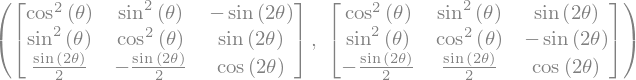

In [5]:
A = Matrix([[m**2, n**2, 2*m*n], [n**2, m**2, -2*m*n], [-m*n, m*n,m**2-n**2]])
At = simplify(A.inv())

At, simplify(A)
# The inverse of the rotation matrix in voigt notation is not the transpose

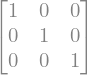

In [6]:
simplify(A.subs(theta,0))

# Definition of the Reuter Matrix $R$

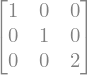

In [7]:
R = Matrix([[1, 0, 0], [0, 1, 0], [0, 0,2]])
Rt = Matrix([[1, 0, 0], [0, 1, 0], [0, 0,0.5]])
R

# transversely isotropic stiffness tensor $C$

$C' = A^{-1}CRAR^{-1}$

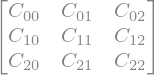

In [8]:
C = Matrix( symarray('C', (3,3)) )
C

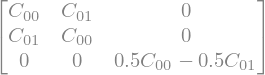

In [9]:
gamma = symbols('\gamma')
C[2,0] = 0
C[2,1] = 0
C[0,2] = 0
C[1,2] = 0
C[1,1] = C[0,0]
C[1,0] = C[0,1]
C[2,2] = 0.5 *(C[0,0] - C[1,0])
#C[2,2] = gamma
C

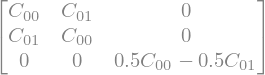

In [10]:
CTrue = simplify(At*C*R*A*Rt)
CTrue

In [11]:
CTrue[2,2]

In [12]:
CPrime = simplify(At*C*A)
CPrime[2,2]

In [13]:
print(ccode(Assignment(x,CTrue[2,2])))

x = 0.5*C_0_0 - 0.5*C_0_1;


In [14]:
CTrue[2,2].subs(theta,0)

In [15]:
simplify(CTrue[2,2].subs(theta,pi/2))

In [16]:
simplify(CTrue[2,2].subs(theta,pi/4))

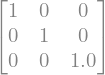

In [17]:
(R*A*Rt).subs(theta,0)

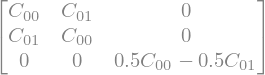

In [18]:
C

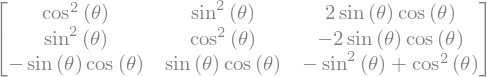

In [19]:
A

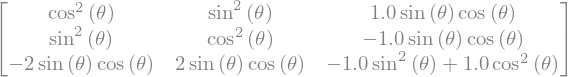

In [20]:
R*A*Rt

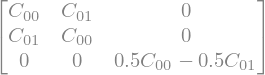

In [21]:
CTrue.subs(theta,pi/2)

In [22]:
v1 = Matrix([4,5,6])
v1

In [23]:
C[0,0] = 1
C[1,1] = 3
C[0,1] = 2
C[1,0] = 2
C[2,2] = 13

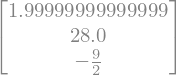

In [24]:
CTrue = simplify(At*C*R*A*Rt)
(CTrue*v1).subs(theta, pi/4)

In [25]:
-9/2

In [26]:
x, n, delta = symbols('x n \delta')


In [84]:
Weight = (1 - 2*abs(x))
Weight

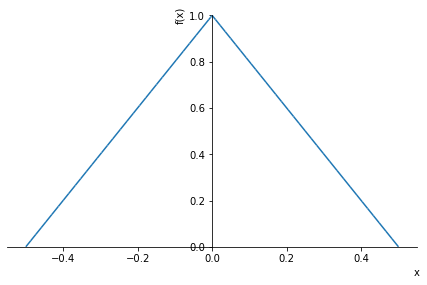

In [85]:
plot(Weight, (x, -0.5, .5), ylim=[0,1])

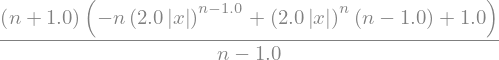

In [81]:
Weight = ((n+1.0)/(n-1.0))*(1.0 - n * (abs(2.0 * x))**( n - 1.0) + (n - 1.0) * (abs(2.0*x))**(n))
Weight

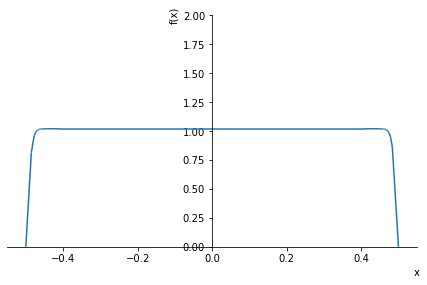

In [83]:
plot(Weight.subs(n,100), (x, -0.5, .5),ylim=[0,2])